**Human Images Generation Model**

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets

In [2]:
transformer = transforms.Compose([
    transforms.CenterCrop((160,160)),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [3]:
datapath=r'C:\Users\artha\Downloads\Human_Images\img_align_celeba'
print("Data path:",datapath)

Data path: C:\Users\artha\Downloads\Human_Images\img_align_celeba


In [4]:
import PIL
from pathlib import Path

datapath=Path(r"C:\Users\artha\Downloads\Human_Images\img_align_celeba/")
Final_datapath=datapath/"img_align_celeba"
Final_datapath

WindowsPath('C:/Users/artha/Downloads/Human_Images/img_align_celeba/img_align_celeba')

In [5]:
import random
from PIL import Image

image_paths=list(Final_datapath.glob('./*.jpg'))
image_paths

random_image_path=random.choice(image_paths)
random_image_path

WindowsPath('C:/Users/artha/Downloads/Human_Images/img_align_celeba/img_align_celeba/114319.jpg')

Size of Image: (178, 218)


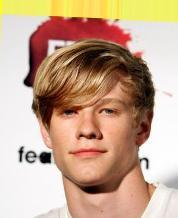

In [6]:
random_image=Image.open(random_image_path)
print("Size of Image:",random_image.size)

random_image

In [7]:
dataset=ImageFolder(root=datapath,transform=transformer)
dataset

Dataset ImageFolder
    Number of datapoints: 202294
    Root location: C:\Users\artha\Downloads\Human_Images\img_align_celeba
    StandardTransform
Transform: Compose(
               CenterCrop(size=(160, 160))
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [8]:
dataloader=DataLoader(dataset=dataset,batch_size=128)
dataloader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size with batch torch.Size([128, 3, 64, 64])
Image size torch.Size([3, 64, 64])


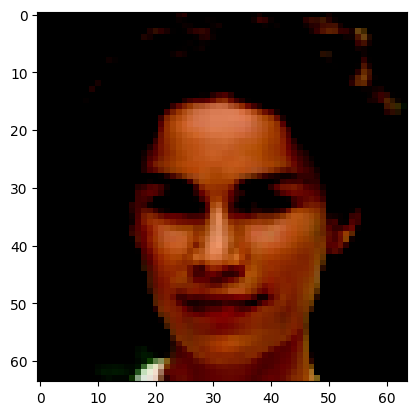

In [9]:
batch=next(iter(dataloader))
images=batch[0]
print(f"Size with batch {images.size()}")

image_single=images[0]
print(f"Image size {image_single.size()}")

image_transposed=image_single.permute(1,2,0)
image_transposed_numpy=image_transposed.numpy()
plt.imshow(image_transposed_numpy)

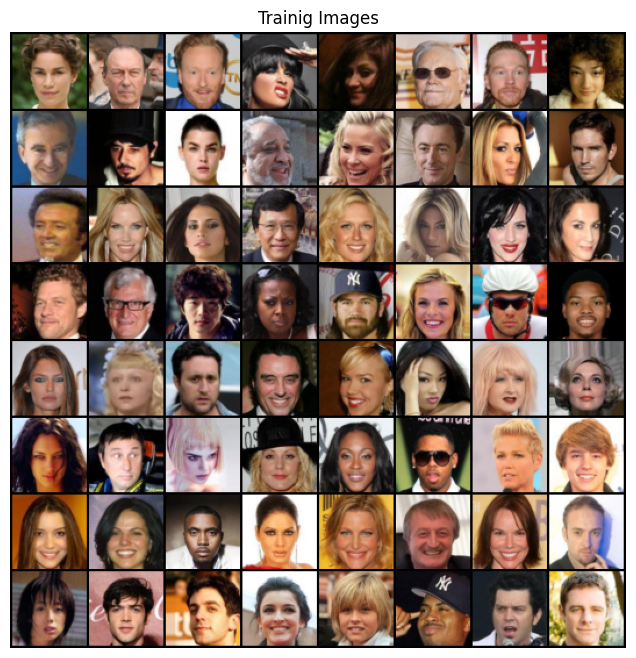

In [10]:
import numpy as np

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Trainig Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:64],padding=2,normalize=True),(1,2,0)))

In [11]:
class DCGAN(torch.nn.Module):

    def __init__(self, latent_dim=100, 
                 num_feat_maps_gen=64, num_feat_maps_dis=64,
                 color_channels=3):
        super().__init__()
        
        self.generator = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, num_feat_maps_gen*8, 
                               kernel_size=4, stride=1, padding=0,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen*8),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen*8 x 4 x 4
            #
            nn.ConvTranspose2d(num_feat_maps_gen*8, num_feat_maps_gen*4, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen*4),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen*4 x 8 x 8
            #
            nn.ConvTranspose2d(num_feat_maps_gen*4, num_feat_maps_gen*2, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen*2),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen*2 x 16 x 16
            #
            nn.ConvTranspose2d(num_feat_maps_gen*2, num_feat_maps_gen, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen x 32 x 32
            #
            nn.ConvTranspose2d(num_feat_maps_gen, color_channels, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            #
            # size: color_channels x 64 x 64
            #
            nn.Tanh()
        )
        
        self.discriminator = nn.Sequential(
            #
            # input size color_channels x image_height x image_width
            #
            nn.Conv2d(color_channels, num_feat_maps_dis,
                      kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis x 32 x 32
            #              
            nn.Conv2d(num_feat_maps_dis, num_feat_maps_dis*2,
                      kernel_size=4, stride=2, padding=1,
                      bias=False),        
            nn.BatchNorm2d(num_feat_maps_dis*2),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis*2 x 16 x 16
            #   
            nn.Conv2d(num_feat_maps_dis*2, num_feat_maps_dis*4,
                      kernel_size=4, stride=2, padding=1,
                      bias=False),        
            nn.BatchNorm2d(num_feat_maps_dis*4),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis*4 x 8 x 8
            #   
            nn.Conv2d(num_feat_maps_dis*4, num_feat_maps_dis*8,
                      kernel_size=4, stride=2, padding=1,
                      bias=False),        
            nn.BatchNorm2d(num_feat_maps_dis*8),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis*8 x 4 x 4
            #   
            nn.Conv2d(num_feat_maps_dis*8, 1,
                      kernel_size=4, stride=1, padding=0),
            
            # size: 1 x 1 x 1
            nn.Flatten(),
            nn.Sigmoid(),
            
        )

            
    def generator_forward(self, z):
        img = self.generator(z)
        return img
    
    def discriminator_forward(self, img):
        logits = model.discriminator(img)
        return logits
    
model=DCGAN()
model

DCGAN(
  (generator): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01, inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01, inplace=True)
    (12): Conv

In [16]:
loss_fn=nn.BCELoss()
optimizer_g=torch.optim.Adam(model.generator.parameters(),lr=0.0002,betas=(0.5,0.999))
optimizer_d=torch.optim.Adam(model.discriminator.parameters(),lr=0.0002,betas=(0.5,0.999))

In [17]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

model.generator.apply(weights_init)
model.discriminator.apply(weights_init)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): LeakyReLU(negative_slope=0.01, inplace=True)
  (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): LeakyReLU(negative_slope=0.01, inplace=True)
  (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.01, inplace=True)
  (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): LeakyReLU(negative_slope=0.01, inplace=True)
  (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Sigmoid()
)

In [18]:
import numpy as np

# Generate and visualize images
def show_images(img):
    # img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

  0%|          | 0/1581 [00:00<?, ?it/s]

100%|██████████| 1581/1581 [2:25:01<00:00,  5.50s/it]  


Epoch [1/5] - D Loss: 0.6727, G Loss: 3.5000


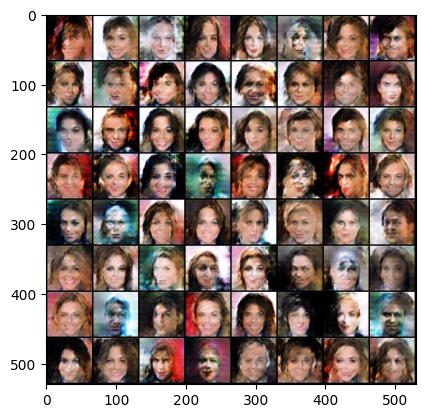

100%|██████████| 1581/1581 [2:20:30<00:00,  5.33s/it] 


Epoch [2/5] - D Loss: 0.2831, G Loss: 3.9492


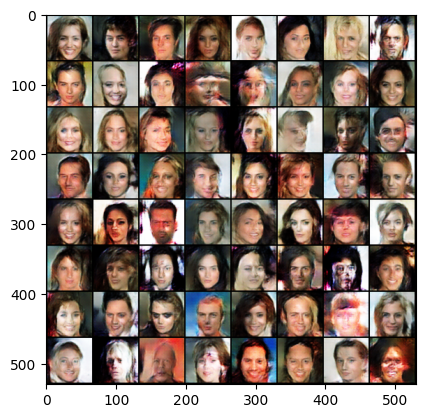

100%|██████████| 1581/1581 [2:15:41<00:00,  5.15s/it]


Epoch [3/5] - D Loss: 0.3577, G Loss: 4.2572


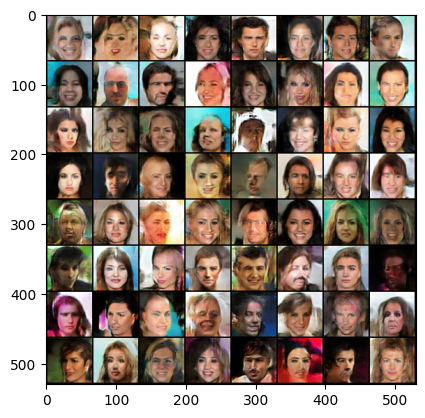

100%|██████████| 1581/1581 [2:18:27<00:00,  5.25s/it]  


Epoch [4/5] - D Loss: 0.1437, G Loss: 3.7337


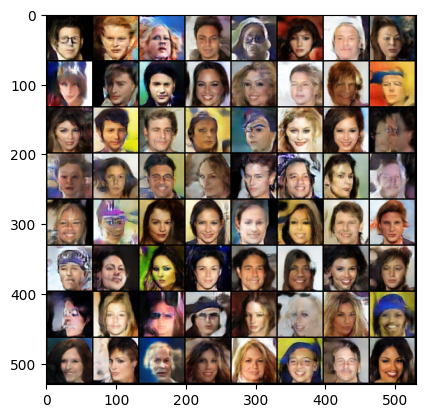

100%|██████████| 1581/1581 [2:35:51<00:00,  5.91s/it]  


Epoch [5/5] - D Loss: 0.1339, G Loss: 2.3152


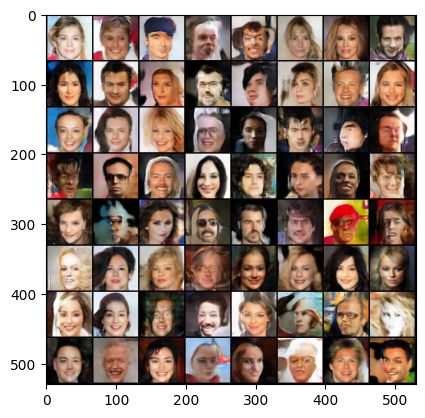

In [19]:
from tqdm import tqdm

def train(model,optimizer_g, optimizer_d, loss_fn, epochs, dataloader, latent_dim):
    for epoch in range(epochs):
        for img, _ in tqdm(dataloader):
            
            # === Train Discriminator ===
            real = torch.ones(img.size(0))
            fake = torch.zeros(img.size(0))
            
            # Real images loss
            optimizer_d.zero_grad()
            discr_pred_real = model.discriminator_forward(img).view(-1)
            real_loss = loss_fn(discr_pred_real, real)
            
            # Fake images loss
            z = torch.randn(img.size(0), latent_dim, 1, 1)
            fake_imgs = model.generator_forward(z)
            discr_pred_fake = model.discriminator_forward(fake_imgs.detach()).view(-1)
            fake_loss = loss_fn(discr_pred_fake, fake)
            
            d_loss = 0.5*(real_loss + fake_loss)
            d_loss.backward()
            optimizer_d.step()

            # === Train Generator ===
            optimizer_g.zero_grad()
            discr_pred_fake = model.discriminator_forward(fake_imgs).view(-1)
            g_loss = loss_fn(discr_pred_fake, real)  # trick the discriminator
            
            g_loss.backward()
            optimizer_g.step()

        print(f"Epoch [{epoch+1}/{epochs}] - D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
        
        # Visualize generated images
        if (epoch + 1) % 1 == 0:  # Visualize after every epoch
            with torch.no_grad():
                z = torch.randn(64, latent_dim, 1, 1)
                generated_images = model.generator_forward(z).detach()
                image_grid = torchvision.utils.make_grid(generated_images, padding=2, normalize=True)
                show_images(image_grid)

train(model,optimizer_g, optimizer_d, loss_fn, epochs=5, dataloader=dataloader, latent_dim=100)

In [20]:
torch.save(model.generator_forward,'./Generator.pth')

In [1]:
import torch
from torch import nn

class DCGAN(torch.nn.Module):

    def __init__(self, latent_dim=100, 
                 num_feat_maps_gen=64, num_feat_maps_dis=64,
                 color_channels=3):
        super().__init__()
        
        self.generator = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, num_feat_maps_gen*8, 
                               kernel_size=4, stride=1, padding=0,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen*8),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen*8 x 4 x 4
            #
            nn.ConvTranspose2d(num_feat_maps_gen*8, num_feat_maps_gen*4, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen*4),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen*4 x 8 x 8
            #
            nn.ConvTranspose2d(num_feat_maps_gen*4, num_feat_maps_gen*2, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen*2),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen*2 x 16 x 16
            #
            nn.ConvTranspose2d(num_feat_maps_gen*2, num_feat_maps_gen, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            nn.BatchNorm2d(num_feat_maps_gen),
            nn.LeakyReLU(inplace=True),
            #
            # size if latent_dim=100: num_feat_maps_gen x 32 x 32
            #
            nn.ConvTranspose2d(num_feat_maps_gen, color_channels, 
                               kernel_size=4, stride=2, padding=1,
                               bias=False),
            #
            # size: color_channels x 64 x 64
            #
            nn.Tanh()
        )
        
        self.discriminator = nn.Sequential(
            #
            # input size color_channels x image_height x image_width
            #
            nn.Conv2d(color_channels, num_feat_maps_dis,
                      kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis x 32 x 32
            #              
            nn.Conv2d(num_feat_maps_dis, num_feat_maps_dis*2,
                      kernel_size=4, stride=2, padding=1,
                      bias=False),        
            nn.BatchNorm2d(num_feat_maps_dis*2),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis*2 x 16 x 16
            #   
            nn.Conv2d(num_feat_maps_dis*2, num_feat_maps_dis*4,
                      kernel_size=4, stride=2, padding=1,
                      bias=False),        
            nn.BatchNorm2d(num_feat_maps_dis*4),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis*4 x 8 x 8
            #   
            nn.Conv2d(num_feat_maps_dis*4, num_feat_maps_dis*8,
                      kernel_size=4, stride=2, padding=1,
                      bias=False),        
            nn.BatchNorm2d(num_feat_maps_dis*8),
            nn.LeakyReLU(inplace=True),
            #
            # size: num_feat_maps_dis*8 x 4 x 4
            #   
            nn.Conv2d(num_feat_maps_dis*8, 1,
                      kernel_size=4, stride=1, padding=0),
            
            # size: 1 x 1 x 1
            nn.Flatten(),
            nn.Sigmoid(),
            
        )

            
    def generator_forward(self, z):
        img = self.generator(z)
        return img
    
    def discriminator_forward(self, img):
        logits = model.discriminator(img)
        return logits
    
model=DCGAN()
model

DCGAN(
  (generator): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01, inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01, inplace=True)
    (12): Conv

In [2]:
import torch

generator=torch.load('./Generator.pth')

def show_images(img):
    # img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)),cmap='grey')
    plt.axis(False)

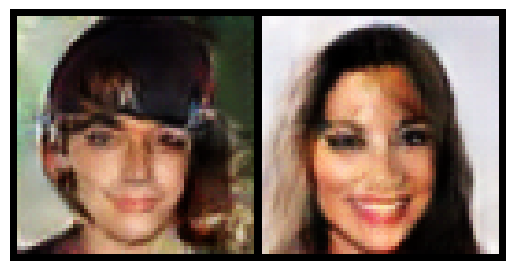

In [49]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def generate_new_images(generator,latent_dim,num_images=2):
    with torch.no_grad():
        noise=torch.randn(num_images,latent_dim,1,1)
        generated_images=generator(noise)
        image_grid=torchvision.utils.make_grid(generated_images,padding=2,normalize=True)
        show_images(image_grid)

latent_dim=100
generate_new_images(generator,latent_dim)